<a href="https://colab.research.google.com/github/poli95/AppPhoto/blob/master/Copia_di_lesson7_superres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Super resolution

In [1]:
pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 28.4MB/s 
  Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101


In [3]:
import fastai
from fastai.vision import *
from fastai.callbacks import *
from fastai.utils.mem import *
 
from torchvision.models import vgg16_bn

In [4]:
import tensorflow_datasets as tfds

In [5]:
dataset = tfds.load('div2k', with_info=True)

EXTRACTING {'train_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip', 'valid_lr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_LR_bicubic_X2.zip', 'train_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip', 'valid_hr_url': 'https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_valid_HR.zip'}


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

Shuffling and writing examples to /root/tensorflow_datasets/div2k/bicubic_x2/2.0.0.incompleteBHSC5W/div2k-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/div2k/bicubic_x2/2.0.0.incompleteBHSC5W/div2k-validation.tfrecord


Dataset div2k downloaded and prepared to /root/tensorflow_datasets/div2k/bicubic_x2/2.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

In [6]:
dataset, info = dataset[0], dataset[1]

In [7]:
train, validation = dataset['train'], dataset['validation']

In [8]:
hr, lr = [], []

for img in tfds.as_numpy(train):
  hr.append(img['hr'])
  #lr.append(img['lr'])



In [ ]:
hr_valid, lr_valid = [], []

for img in tfds.as_numpy(validation):
  hr_valid.append(img['hr'])
  lr_valid.append(img['lr'])

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


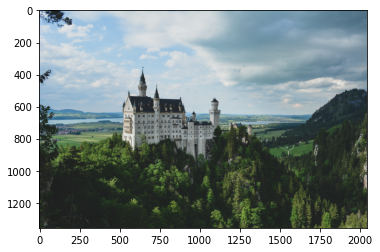

In [10]:
plt.imshow(hr[0])

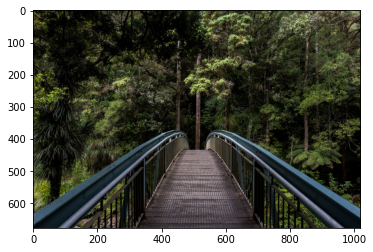

In [ ]:
plt.imshow(lr_valid[0])

In [11]:
def save_images(images, nome_cartella):

  for id, img in enumerate(images):
    path = '/{}/'.format(nome_cartella)
    plt.imsave(path + '{}.png'.format(id), img)
    

In [61]:
def resize_img(fn, img, reduction):
  img = PIL.Image.fromarray(img)
  size = (img.size[0]/reduction)
  targ_sz = resize_to(img, size, use_min=True)
  img = img.resize(targ_sz, resample = PIL.Image.BILINEAR).convert('RGB')
  img.save('/low_res/{}.png'.format(fn))

In [60]:
resize_img('prova', hr[0],20)

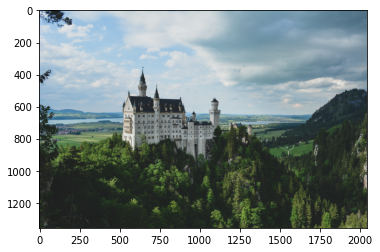

In [49]:
plt.imshow(hr[0])

In [62]:
REDUCTION = 20

for id, hr_img in enumerate(hr):
  lr_img = resize_img(id, hr_img, REDUCTION) 


In [63]:
save_images(hr, 'high_res')

In [64]:
#ZIP HIGH_RES FOLDER

!zip -r /hr.zip /high_res

  adding: high_res/ (stored 0%)
  adding: high_res/494.png (deflated 0%)
  adding: high_res/672.png (deflated 0%)
  adding: high_res/35.png (deflated 0%)
  adding: high_res/145.png (deflated 0%)
  adding: high_res/28.png (deflated 0%)
  adding: high_res/301.png (deflated 0%)
  adding: high_res/651.png (deflated 0%)
  adding: high_res/317.png (deflated 0%)
  adding: high_res/527.png (deflated 0%)
  adding: high_res/720.png (deflated 0%)
  adding: high_res/306.png (deflated 0%)
  adding: high_res/669.png (deflated 0%)
  adding: high_res/294.png (deflated 0%)
  adding: high_res/166.png (deflated 0%)
  adding: high_res/485.png (deflated 0%)
  adding: high_res/437.png (deflated 0%)
  adding: high_res/573.png (deflated 0%)
  adding: high_res/560.png (deflated 0%)
  adding: high_res/783.png (deflated 0%)
  adding: high_res/128.png (deflated 0%)
  adding: high_res/654.png (deflated 0%)
  adding: high_res/324.png (deflated 0%)
  adding: high_res/508.png (deflated 0%)
  adding: high_res/618.png 

In [ ]:
#save_images(lr, 'low_res')

In [ ]:
h = ImageList.from_folder('/high_res')

In [ ]:
l = ImageImageList.from_folder('/low_res').split_by_rand_pct(0.1, seed=42)
bs,size = 8, 256


In [ ]:
def get_data(bs,size):
    data = (l.label_from_func(lambda x: '/high_res/{}'.format(x.name))
           .transform(get_transforms(max_zoom=1.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [ ]:
data = get_data(bs, size)

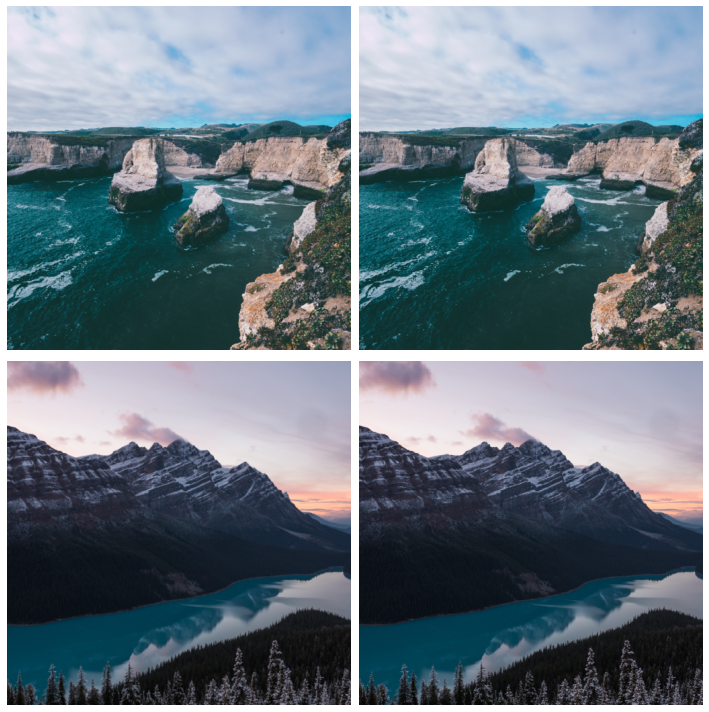

In [ ]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(10,10))

In [ ]:
arch = models.resnet34

In [ ]:
path = untar_data(URLs.PETS)
path_hr = path/'images'
path_lr = path/'small-96'
path_mr = path/'small-256'

In [ ]:
il = ImageList.from_folder(path_hr)

In [ ]:
def resize_one(fn, i, path, size):
    dest = path/fn.relative_to(path_hr)
    dest.parent.mkdir(parents=True, exist_ok=True)
    img = PIL.Image.open(fn)
    targ_sz = resize_to(img, size, use_min=True)
    img = img.resize(targ_sz, resample=PIL.Image.BILINEAR).convert('RGB')
    img.save(dest, quality=60)

In [ ]:
# create smaller image sets the first time this nb is run
sets = [(path_lr, 96), (path_mr, 256)]
for p,size in sets:
    if not p.exists(): 
        print(f"resizing to {size} into {p}")
        parallel(partial(resize_one, path=p, size=size), il.items)

In [ ]:
bs,size=32,128
arch = models.resnet34

src = ImageImageList.from_folder(path_lr).split_by_rand_pct(0.1, seed=42)

NameError: ignored

In [ ]:
def get_data(bs,size):
    data = (src.label_from_func(lambda x: path_hr/x.name)
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [ ]:
data = get_data(bs,size)

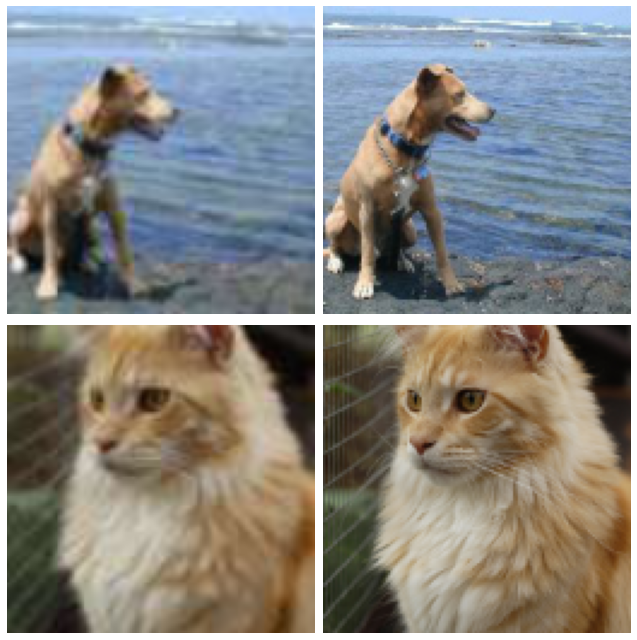

In [ ]:
data.show_batch(ds_type=DatasetType.Valid, rows=2, figsize=(9,9))

## Feature loss

In [ ]:
t = data.valid_ds[0][1].data
t = torch.stack([t,t])

In [ ]:
def gram_matrix(x):
    n,c,h,w = x.size()
    x = x.view(n, c, -1)
    return (x @ x.transpose(1,2))/(c*h*w)

In [ ]:
gram_matrix(t)

tensor([[[0.0856, 0.0917, 0.0983],
         [0.0917, 0.1037, 0.1117],
         [0.0983, 0.1117, 0.1209]],

        [[0.0856, 0.0917, 0.0983],
         [0.0917, 0.1037, 0.1117],
         [0.0983, 0.1117, 0.1209]]])

In [ ]:
base_loss = F.l1_loss

In [ ]:
vgg_m = vgg16_bn(True).features.cuda().eval()
requires_grad(vgg_m, False)

In [ ]:
blocks = [i-1 for i,o in enumerate(children(vgg_m)) if isinstance(o,nn.MaxPool2d)]
blocks, [vgg_m[i] for i in blocks]

([5, 12, 22, 32, 42],
 [ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True),
  ReLU(inplace=True)])

In [ ]:
class FeatureLoss(nn.Module):
    def __init__(self, m_feat, layer_ids, layer_wgts):
        super().__init__()
        self.m_feat = m_feat
        self.loss_features = [self.m_feat[i] for i in layer_ids]
        self.hooks = hook_outputs(self.loss_features, detach=False)
        self.wgts = layer_wgts
        self.metric_names = ['pixel',] + [f'feat_{i}' for i in range(len(layer_ids))
              ] + [f'gram_{i}' for i in range(len(layer_ids))]

    def make_features(self, x, clone=False):
        self.m_feat(x)
        return [(o.clone() if clone else o) for o in self.hooks.stored]
    
    def forward(self, input, target):
        out_feat = self.make_features(target, clone=True)
        in_feat = self.make_features(input)
        self.feat_losses = [base_loss(input,target)]
        self.feat_losses += [base_loss(f_in, f_out)*w
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.feat_losses += [base_loss(gram_matrix(f_in), gram_matrix(f_out))*w**2 * 5e3
                             for f_in, f_out, w in zip(in_feat, out_feat, self.wgts)]
        self.metrics = dict(zip(self.metric_names, self.feat_losses))
        return sum(self.feat_losses)
    
    def __del__(self): self.hooks.remove()

In [ ]:
feat_loss = FeatureLoss(vgg_m, blocks[2:5], [5,15,2])

## Train

In [ ]:
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, loss_func=feat_loss, callback_fns=LossMetrics,
                     blur=True, norm_type=NormType.Weight)
gc.collect();

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


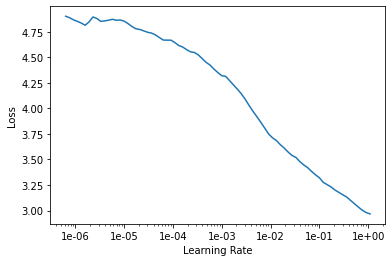

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-3

In [ ]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9):
    learn.fit_one_cycle(10, lrs, pct_start=pct_start)
    learn.save(save_name)
    learn.show_results(rows=1, imgsize=5)

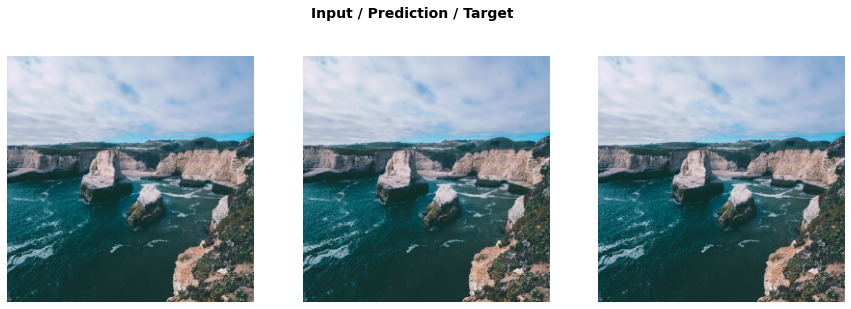

In [ ]:
do_fit('model', slice(lr*10))

In [ ]:
print(learn)

In [ ]:
learn.export('../../../../../../model.pkl')

In [ ]:
learn.unfreeze()

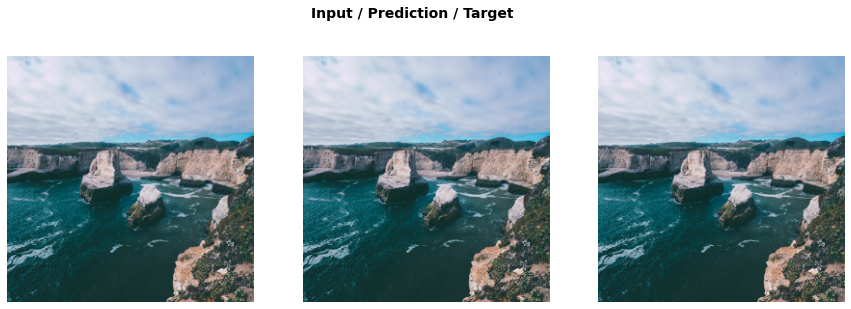

In [ ]:
do_fit('1b', slice(1e-5,lr))

In [ ]:
data = get_data(12,size*2)

In [ ]:
learn.data = data
learn.freeze()
gc.collect()

0

In [ ]:
learn.load('1b');

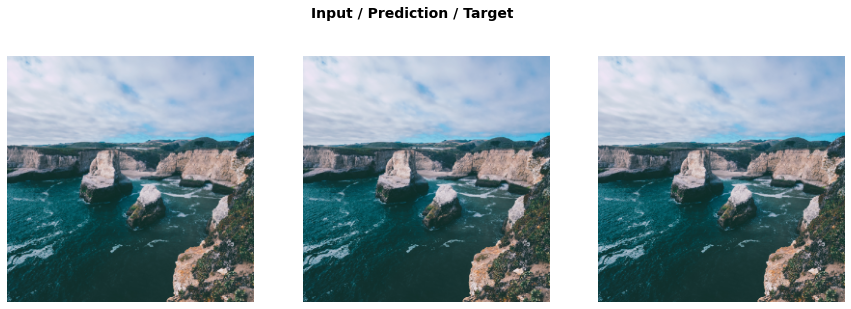

In [ ]:
do_fit('2a')

In [ ]:
learn.unfreeze()

In [ ]:
arch = models.resnet34

In [ ]:
learn = None
learn = unet_learner(data, arch, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [ ]:
learn = learn.load('model')

In [ ]:
print(learn)

Learner(data=ImageDataBunch;

Train: LabelList (720 items)
x: ImageImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /low_res;

Valid: LabelList (80 items)
x: ImageImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: /low_res;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock

In [ ]:
img = open_image('/low_res/21.png')

In [ ]:
free = gpu_mem_get_free_no_cache()
# the max size of the test image depends on the available GPU RAM 
if free > 8000: size=(1280, 1600) # >  8GB RAM
else:           size=( 820, 1024) # <= 8GB RAM
print(f"using size={size}, have {free}MB of GPU RAM free")

using size=(1280, 1600), have 9012MB of GPU RAM free


In [ ]:
size = (img.size[0]*3, img.size[1]*3)

In [ ]:
data_mr = (ImageImageList.from_folder('/low_res').split_by_rand_pct(0.1, seed=42)
          .label_from_func(lambda x: '/high_res/{}'.format(x.name))
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_mr.c = 3

In [ ]:
learn.data

ImageDataBunch;

Train: LabelList (720 items)
x: ImageImageList
Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034)
y: ImageList
Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034)
Path: /low_res;

Valid: LabelList (80 items)
x: ImageImageList
Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034)
y: ImageList
Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034),Image (3, 3060, 2034)
Path: /low_res;

Test: None

In [ ]:
learn.data = data_mr

In [ ]:
p, img_hr, b = learn.predict(img) 

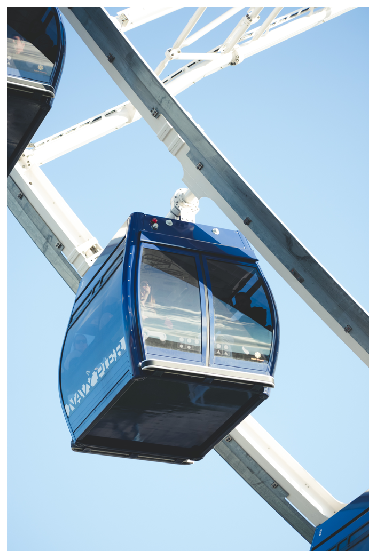

In [ ]:
show_image(img, figsize=(10,10), interpolation='nearest')
img.save('/low.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


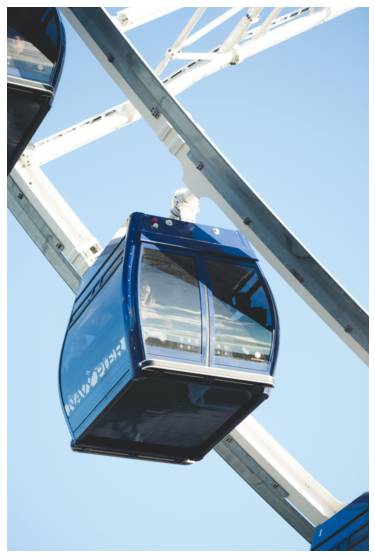

In [ ]:
Image(img_hr).show(figsize=(10,10))

In [ ]:
Image(img_hr).save('/immagine_prova.png')

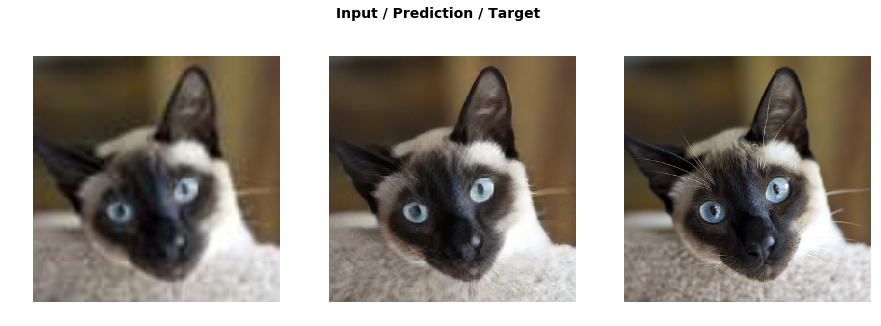

In [ ]:
do_fit('2b', slice(1e-6,1e-4), pct_start=0.3)

## Test

In [ ]:
learn = None
gc.collect();

In [ ]:
256/320*1024

819.2

In [ ]:
256/320*1600

1280.0

In [ ]:
free = gpu_mem_get_free_no_cache()
# the max size of the test image depends on the available GPU RAM 
if free > 8000: size=(1280, 1600) # >  8GB RAM
else:           size=( 820, 1024) # <= 8GB RAM
print(f"using size={size}, have {free}MB of GPU RAM free")

using size=(820, 1024), have 7552MB of RAM free


In [ ]:
learn = unet_learner(data, arch, loss_func=F.l1_loss, blur=True, norm_type=NormType.Weight)

In [ ]:
data_mr = (ImageImageList.from_folder(path_mr).split_by_rand_pct(0.1, seed=42)
          .label_from_func(lambda x: path_hr/x.name)
          .transform(get_transforms(), size=size, tfm_y=True)
          .databunch(bs=1).normalize(imagenet_stats, do_y=True))
data_mr.c = 3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
learn.load('2b');

In [ ]:
learn.data = data_mr

In [ ]:
fn = data_mr.valid_ds.x.items[0]; fn

PosixPath('/data1/jhoward/git/course-v3/nbs/dl1/data/oxford-iiit-pet/small-256/Siamese_178.jpg')

In [ ]:
img = open_image(fn); img.shape

torch.Size([3, 256, 320])

In [ ]:
p,img_hr,b = learn.predict(img)

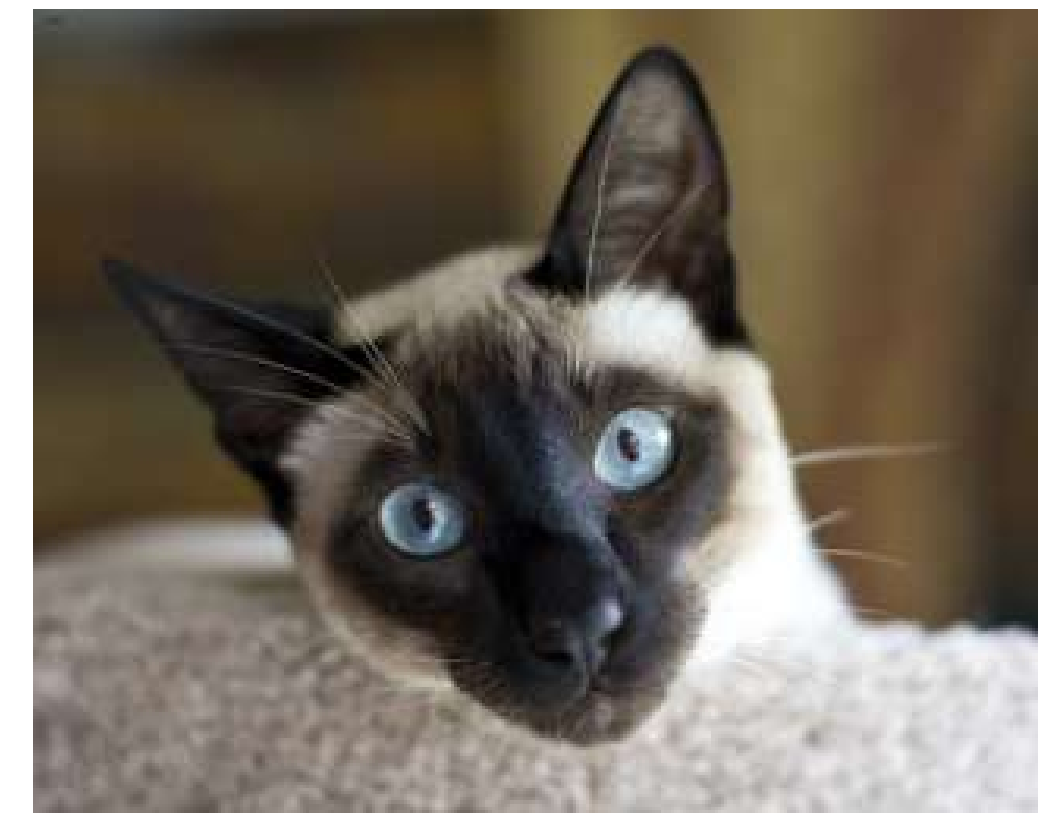

In [ ]:
show_image(img, figsize=(18,15), interpolation='nearest');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


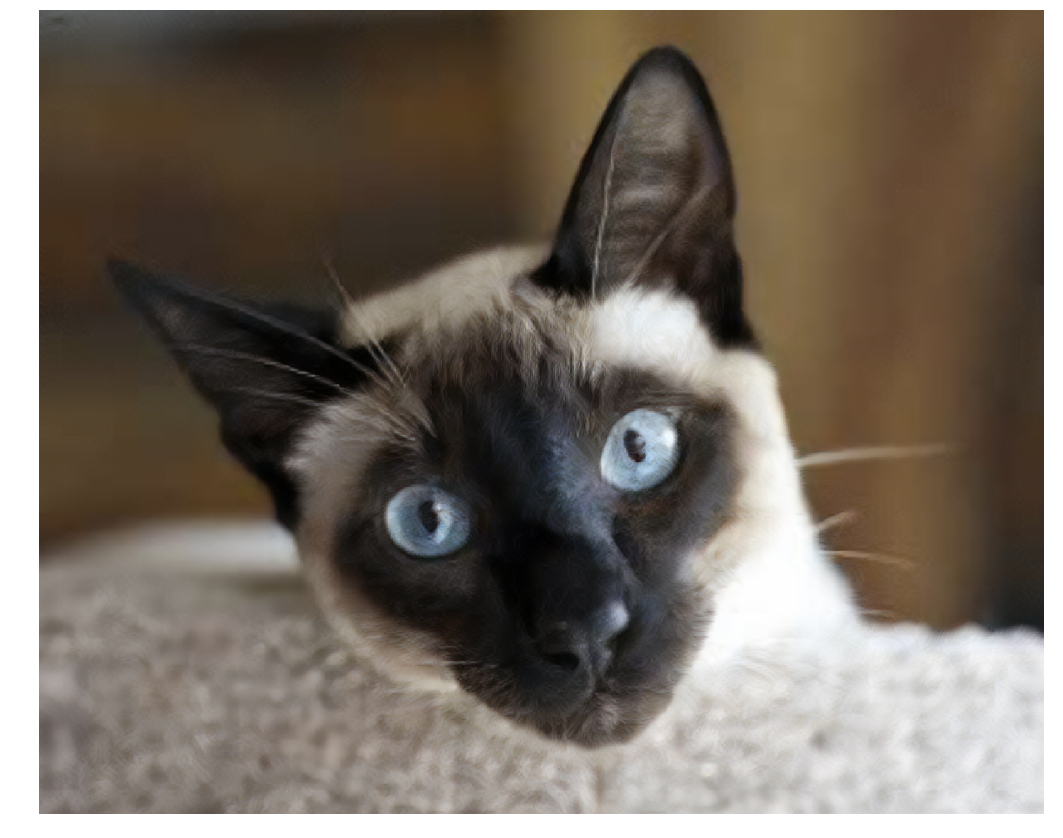

In [ ]:
Image(img_hr).show(figsize=(18,15))